## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [1]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

mkdir: cannot create directory ‘/data’: File exists
--2019-10-25 18:13:55--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.178.157
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.178.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip.1’

train-test-data.zip 100%[===================>] 322.93M  10.6MB/s    in 23s     

2019-10-25 18:14:18 (14.2 MB/s) - ‘/data/train-test-data.zip.1’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip


<div class="alert alert-info">**Note:** Workspaces automatically close connections after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training. (The active_session context manager is imported below.)
</div>
```
from workspace_utils import active_session

```


In [2]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training
from workspace_utils import active_session

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [3]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

# ## TODO: Once you've define the network, you can instantiate it
# # one example conv layer has been provided for you 
from models import Net #uncomment this after changing model.py



# --------------------------------------------------


# ## TODO: define the convolutional neural network architecture

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# # can use the below import should you choose to initialize the weights of your Net
# import torch.nn.init as I


# class Net(nn.Module):

#     def __init__(self):
#         super(Net, self).__init__()
        
#         ## TODO: Define all the layers of this CNN, the only requirements are:
#         ## 1. This network takes in a square (same width and height), grayscale image as input
#         ## 2. It ends with a linear layer that represents the keypoints
#         ## it's suggested that you make this last layer output 136 values, 2 for each of the 68 keypoint (x, y) pairs
        
#         # As an example, you've been given a convolutional layer, which you may (but don't have to) change:
#         # 1 input image channel (grayscale), 32 output channels/feature maps, 5x5 square convolution kernel
#         self.conv1 = nn.Conv2d(1, 32, 5)
#         self.conv2 = nn.Conv2d(32,64,5)
#         self.conv3 = nn.Conv2d(64,128,3)
#         self.conv4 = nn.Conv2d(128,256,2)
        
#         ## Note that among the layers to add, consider including:
#         # maxpooling layers, multiple conv layers, fully-connected layers, and other layers (such as dropout or batch normalization) to avoid overfitting
        
#         self.MaxPool2d(3,3)

        
#     def forward(self, x):
#         ## TODO: Define the feedforward behavior of this model
#         ## x is the input image and, as an example, here you may choose to include a pool/conv step:
#         ## x = self.pool(F.relu(self.conv1(x)))
        
        
#         # a modified x, having gone through all the layers of your model, should be returned
#         return x






# #................................................................

net = Net()
print(net)



Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=18432, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=136, bias=True)
  (drop1): Dropout(p=0.1)
  (drop2): Dropout(p=0.2)
  (drop3): Dro

## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [16]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(250),
                                     RandomCrop(224),
                                     Normalize(),
                                     ToTensor()])

## Rescale -> Croping -> Normalize -> convert to tensor

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [17]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains. Too large a batch size may cause your model to crash and/or run out of memory while training.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [28]:
# load training data in batches
batch_size = 16

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [29]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                             root_dir='/data/test/',
                                             transform=data_transform)



In [30]:
# load test data in batches
batch_size = 16

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [31]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [32]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([16, 1, 224, 224])
torch.Size([16, 68, 2])
torch.Size([16, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [33]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

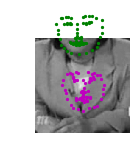

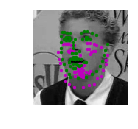

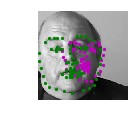

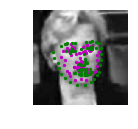

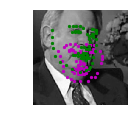

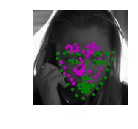

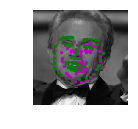

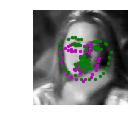

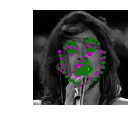

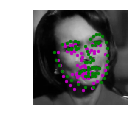

In [38]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [39]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.MSELoss()

optimizer = optim.Adam(params = net.parameters(), lr = 0.001)

# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.03)



## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [40]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0

    print('Finished Training')


In [41]:
# train your network
n_epochs = 7 # start small, and increase when you've decided on your model structure and hyperparams

# this is a Workspaces-specific context manager to keep the connection
# alive while training your model, not part of pytorch
with active_session():
    train_net(n_epochs)

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 0.16541072502732276
Epoch: 1, Batch: 20, Avg. Loss: 0.1807302564382553
Epoch: 1, Batch: 30, Avg. Loss: 0.1858254477381706
Epoch: 1, Batch: 40, Avg. Loss: 0.26470424681901933
Epoch: 1, Batch: 50, Avg. Loss: 0.19284864962100984
Epoch: 1, Batch: 60, Avg. Loss: 0.22971855401992797
Epoch: 1, Batch: 70, Avg. Loss: 0.15818613842129708
Epoch: 1, Batch: 80, Avg. Loss: 0.2063266932964325
Epoch: 1, Batch: 90, Avg. Loss: 0.18088370487093924
Epoch: 1, Batch: 100, Avg. Loss: 0.1662619188427925
Epoch: 1, Batch: 110, Avg. Loss: 0.17424601018428804
Epoch: 1, Batch: 120, Avg. Loss: 0.15501377806067468
Epoch: 1, Batch: 130, Avg. Loss: 0.26553051024675367
Epoch: 1, Batch: 140, Avg. Loss: 0.16562023758888245
Epoch: 1, Batch: 150, Avg. Loss: 0.16619447842240334
Epoch: 1, Batch: 160, Avg. Loss: 0.15558335334062576
Epoch: 1, Batch: 170, Avg. Loss: 0.22853004485368728
Epoch: 1, Batch: 180, Avg. Loss: 0.20429313331842422
Epoch: 1, Batch: 190, Avg. Loss: 0.17132204920053482
Epoch:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.1631529837846756
Epoch: 2, Batch: 20, Avg. Loss: 0.21581993401050567
Epoch: 2, Batch: 30, Avg. Loss: 0.1647631771862507
Epoch: 2, Batch: 40, Avg. Loss: 0.16962704956531524
Epoch: 2, Batch: 50, Avg. Loss: 0.19713758379220964
Epoch: 2, Batch: 60, Avg. Loss: 0.1999250791966915
Epoch: 2, Batch: 70, Avg. Loss: 0.23095028847455978
Epoch: 2, Batch: 80, Avg. Loss: 0.1677644968032837
Epoch: 2, Batch: 90, Avg. Loss: 0.21512603014707565
Epoch: 2, Batch: 100, Avg. Loss: 0.19495637863874435
Epoch: 2, Batch: 110, Avg. Loss: 0.1790715090930462
Epoch: 2, Batch: 120, Avg. Loss: 0.17188014462590218
Epoch: 2, Batch: 130, Avg. Loss: 0.2165026605129242
Epoch: 2, Batch: 140, Avg. Loss: 0.25880576893687246
Epoch: 2, Batch: 150, Avg. Loss: 0.1702287070453167
Epoch: 2, Batch: 160, Avg. Loss: 0.20499352663755416
Epoch: 2, Batch: 170, Avg. Loss: 0.19276134073734283
Epoch: 2, Batch: 180, Avg. Loss: 0.17451826557517053
Epoch: 2, Batch: 190, Avg. Loss: 0.17649485990405084
Epoch: 2,

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.17208386734127998
Epoch: 3, Batch: 20, Avg. Loss: 0.1957358106970787
Epoch: 3, Batch: 30, Avg. Loss: 0.2073589086532593
Epoch: 3, Batch: 40, Avg. Loss: 0.1841662734746933
Epoch: 3, Batch: 50, Avg. Loss: 0.22954852283000945
Epoch: 3, Batch: 60, Avg. Loss: 0.2035193420946598
Epoch: 3, Batch: 70, Avg. Loss: 0.1517971307039261
Epoch: 3, Batch: 80, Avg. Loss: 0.17491898983716964
Epoch: 3, Batch: 90, Avg. Loss: 0.20017917975783348
Epoch: 3, Batch: 100, Avg. Loss: 0.17073249444365501
Epoch: 3, Batch: 110, Avg. Loss: 0.17260147482156754
Epoch: 3, Batch: 120, Avg. Loss: 0.20711713582277297
Epoch: 3, Batch: 130, Avg. Loss: 0.21512749642133713
Epoch: 3, Batch: 140, Avg. Loss: 0.16286603808403016
Epoch: 3, Batch: 150, Avg. Loss: 0.18137162104249
Epoch: 3, Batch: 160, Avg. Loss: 0.17292152643203734
Epoch: 3, Batch: 170, Avg. Loss: 0.18361538723111154
Epoch: 3, Batch: 180, Avg. Loss: 0.14684599936008452
Epoch: 3, Batch: 190, Avg. Loss: 0.17047573029994964
Epoch: 3, 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.18072194755077362
Epoch: 4, Batch: 20, Avg. Loss: 0.17308795526623727
Epoch: 4, Batch: 30, Avg. Loss: 0.16967786177992822
Epoch: 4, Batch: 40, Avg. Loss: 0.17162378132343292
Epoch: 4, Batch: 50, Avg. Loss: 0.21935610249638557
Epoch: 4, Batch: 60, Avg. Loss: 0.21502888947725296
Epoch: 4, Batch: 70, Avg. Loss: 0.22428403049707413
Epoch: 4, Batch: 80, Avg. Loss: 0.16310718655586243
Epoch: 4, Batch: 90, Avg. Loss: 0.26453265100717543
Epoch: 4, Batch: 100, Avg. Loss: 0.2112249456346035
Epoch: 4, Batch: 110, Avg. Loss: 0.20901264548301696
Epoch: 4, Batch: 120, Avg. Loss: 0.18127734512090682
Epoch: 4, Batch: 130, Avg. Loss: 0.22471124455332755
Epoch: 4, Batch: 140, Avg. Loss: 0.18707434087991714
Epoch: 4, Batch: 150, Avg. Loss: 0.16088183000683784
Epoch: 4, Batch: 160, Avg. Loss: 0.17395898923277855
Epoch: 4, Batch: 170, Avg. Loss: 0.2065870076417923
Epoch: 4, Batch: 180, Avg. Loss: 0.1657231405377388
Epoch: 4, Batch: 190, Avg. Loss: 0.16746261790394784
Epoch

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.16360993981361388
Epoch: 5, Batch: 20, Avg. Loss: 0.14784858375787735
Epoch: 5, Batch: 30, Avg. Loss: 0.17372951284050941
Epoch: 5, Batch: 40, Avg. Loss: 0.3253970339894295
Epoch: 5, Batch: 50, Avg. Loss: 0.16970266550779342
Epoch: 5, Batch: 60, Avg. Loss: 0.20069639533758163
Epoch: 5, Batch: 70, Avg. Loss: 0.17943410947918892
Epoch: 5, Batch: 80, Avg. Loss: 0.1934844434261322
Epoch: 5, Batch: 90, Avg. Loss: 0.22492317110300064
Epoch: 5, Batch: 100, Avg. Loss: 0.2007688105106354
Epoch: 5, Batch: 110, Avg. Loss: 0.20611691772937774
Epoch: 5, Batch: 120, Avg. Loss: 0.1898183085024357
Epoch: 5, Batch: 130, Avg. Loss: 0.20553207471966745
Epoch: 5, Batch: 140, Avg. Loss: 0.16368183568120004
Epoch: 5, Batch: 150, Avg. Loss: 0.2566609546542168
Epoch: 5, Batch: 160, Avg. Loss: 0.21448541283607483
Epoch: 5, Batch: 170, Avg. Loss: 0.16986824795603753
Epoch: 5, Batch: 180, Avg. Loss: 0.1619176983833313
Epoch: 5, Batch: 190, Avg. Loss: 0.17548607140779496
Epoch: 5

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.18292727917432786
Epoch: 6, Batch: 20, Avg. Loss: 0.14968996196985246
Epoch: 6, Batch: 30, Avg. Loss: 0.20531170219182968
Epoch: 6, Batch: 40, Avg. Loss: 0.18748645707964898
Epoch: 6, Batch: 50, Avg. Loss: 0.22199107110500335
Epoch: 6, Batch: 60, Avg. Loss: 0.1942223072052002
Epoch: 6, Batch: 70, Avg. Loss: 0.21742860227823257
Epoch: 6, Batch: 80, Avg. Loss: 0.22037721425294876
Epoch: 6, Batch: 90, Avg. Loss: 0.3006234437227249
Epoch: 6, Batch: 100, Avg. Loss: 0.15381432473659515
Epoch: 6, Batch: 110, Avg. Loss: 0.1775645300745964
Epoch: 6, Batch: 120, Avg. Loss: 0.1857764482498169
Epoch: 6, Batch: 130, Avg. Loss: 0.20072615891695023
Epoch: 6, Batch: 140, Avg. Loss: 0.16932922154664992
Epoch: 6, Batch: 150, Avg. Loss: 0.200120185315609
Epoch: 6, Batch: 160, Avg. Loss: 0.17345330417156218
Epoch: 6, Batch: 170, Avg. Loss: 0.16302231475710868
Epoch: 6, Batch: 180, Avg. Loss: 0.1800113096833229
Epoch: 6, Batch: 190, Avg. Loss: 0.1950436934828758
Epoch: 6, 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.18170204162597656
Epoch: 7, Batch: 20, Avg. Loss: 0.18879760205745696
Epoch: 7, Batch: 30, Avg. Loss: 0.2026921659708023
Epoch: 7, Batch: 40, Avg. Loss: 0.17549232095479966
Epoch: 7, Batch: 50, Avg. Loss: 0.1766265869140625
Epoch: 7, Batch: 60, Avg. Loss: 0.17284565940499305
Epoch: 7, Batch: 70, Avg. Loss: 0.1824338749051094
Epoch: 7, Batch: 80, Avg. Loss: 0.17705956548452378
Epoch: 7, Batch: 90, Avg. Loss: 0.20994820296764374
Epoch: 7, Batch: 100, Avg. Loss: 0.17153486236929893
Epoch: 7, Batch: 110, Avg. Loss: 0.26260055154561995
Epoch: 7, Batch: 120, Avg. Loss: 0.26883678287267687
Epoch: 7, Batch: 130, Avg. Loss: 0.17993876188993455
Epoch: 7, Batch: 140, Avg. Loss: 0.19479287266731263
Epoch: 7, Batch: 150, Avg. Loss: 0.176254353672266
Epoch: 7, Batch: 160, Avg. Loss: 0.1694696545600891
Epoch: 7, Batch: 170, Avg. Loss: 0.16595257371664046
Epoch: 7, Batch: 180, Avg. Loss: 0.22257061600685119
Epoch: 7, Batch: 190, Avg. Loss: 0.17252369299530984
Epoch: 7

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [42]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([16, 1, 224, 224])
torch.Size([16, 68, 2])
torch.Size([16, 68, 2])


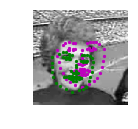

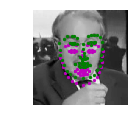

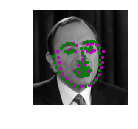

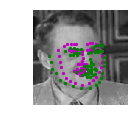

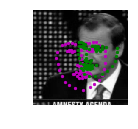

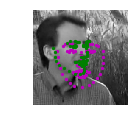

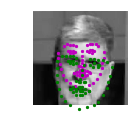

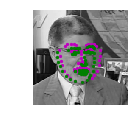

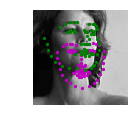

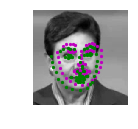

In [43]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

# visualize_output(test_images, test_outputs, gt_pts)
visualize_output(test_images, test_outputs, gt_pts)

Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [44]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_1.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


I used MSELoss() because it measures the Mean Square Error b/w each x(input) and y(target). MSELoss() calculates the mean(L),sum(L) whenever size_average=True or false respectively.


### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

I started off with a samll model with 2 layers and gradually added layer over time , as long as I observed , there is reduction in loss . I tried 2 type of optamization ( SGD and Adam with MSELoss criterion . the model was inspired by VGG 13 .



### Question 3: How did you decide on the number of epochs and batch_size to train your model?

I stared of with Epoch = 1 and BatchSize = 10 , then increased Epoch = 10 after I found a suitable model to train 

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[ 0.13164711  0.04755995  0.1815841  -0.06400555  0.16227272]
 [ 0.20382309 -0.12417609 -0.01370495 -0.03769876  0.22929569]
 [ 0.03002901 -0.1545634  -0.07647755  0.04476875 -0.1029891 ]
 [-0.17110084  0.01688069 -0.13330144 -0.10023277 -0.15937527]
 [ 0.04858689  0.19044152  0.14283831 -0.17280073 -0.01361265]]
(5, 5)


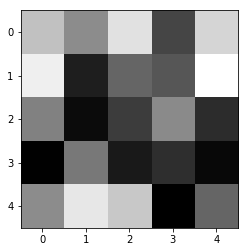

In [45]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

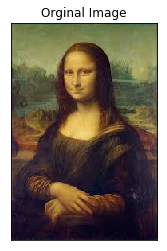

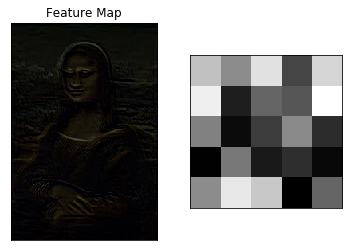

In [46]:
##TODO: load in and display any image from the transformed test dataset

## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image


import cv2

# Loading the image
image = cv2.imread('./images/mona_lisa.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.title("Orginal Image")

# Applying the image
filtered = cv2.filter2D(image, -1, w[filter_index][0])

# Visualization
fig = plt.figure()
ax = fig.add_subplot(121, xticks = [], yticks = [])
ax.imshow(filtered)
ax.set_title("Feature Map")
ax = fig.add_subplot(122, xticks = [], yticks = [])
ax.imshow(w[filter_index][0], cmap = 'gray')

plt.show()



### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


The hidden layers of the neural network carry out feature extraction from the image i.e. here the CNN detects the areas that have high or low content of brightness in the image

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!